# **Boston House Price Prediction**

# ***Dataset Information***
Boston Housing Dataset Attribute Information ( in order):
     *CRIM    per capita crime rate by town
     *ZN      proportion of residential land zoned for lots over 25,000sq.ft.
     *INDUS   proportion of non-retail bussiness acress per town
     *CHAS    charles river dummy variable (1 if tract bounds river;0 otherwise)
     *NOX     nitric oxides concentration(parts per 10 million)
     *RM      average no.of rooms per dwelling
     *AGE     proportion of owner-occured units builts prior to 1940
     *DIS     weighted distances to five Boston employment centres
     *RAD     index of accessibility to radial highways
     *TAX     full-value property-tax rate per $10,000
     *PTRATIO pupil-teacher ratio by town
     *B       1000(BK-0.63)^2 where Bk is the proportion of blacks by town
     *LSTAT   % lower status of the population
     *MEDV    Medium value of owner-occupied homes in $1000's 










## ***Import Modules***

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## ***Loding Dataset***

In [ ]:
import pandas as pd
df=pd.read_csv('/content/boston.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
#datatype info
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## ***Preprocessing the dataset***

In [ ]:
#check for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## ***Exploratory Data Analysis***

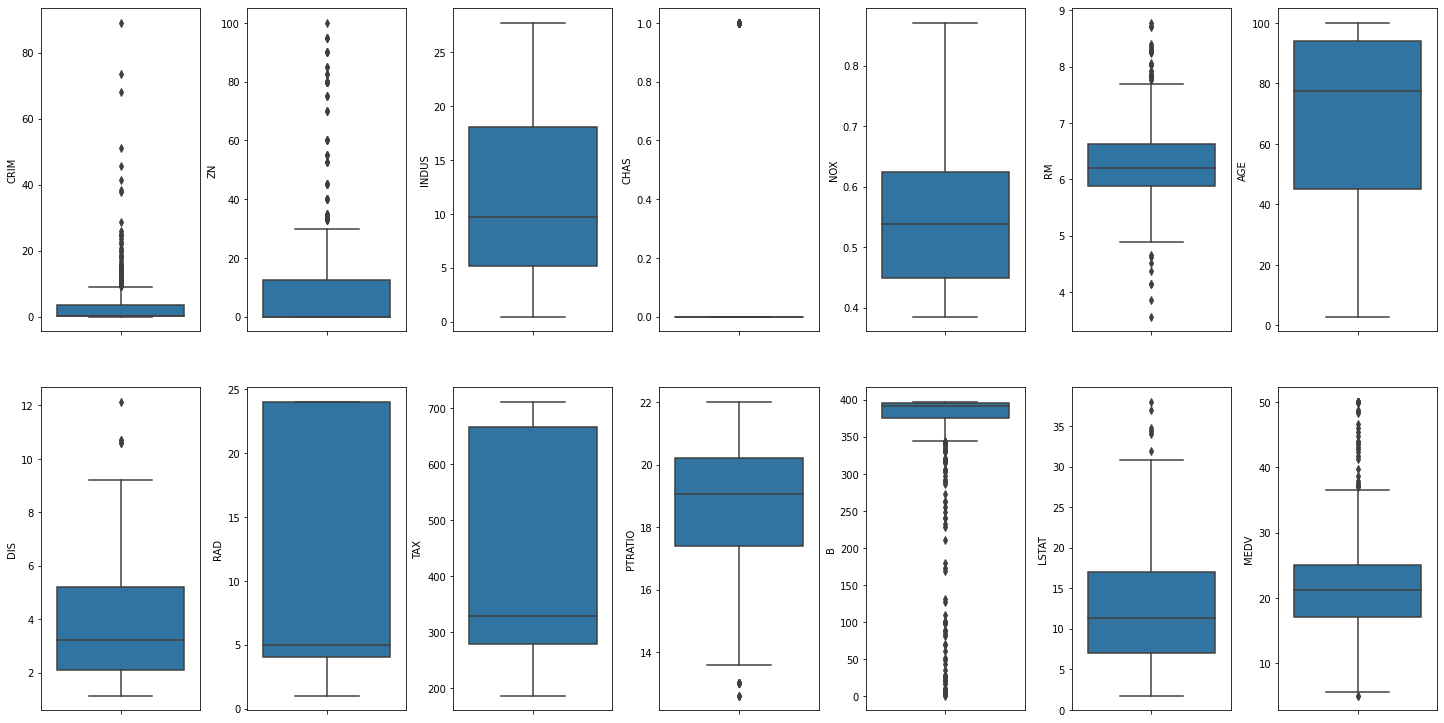

In [ ]:
# create box plots
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
  sns.boxplot(y=col, data=df, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

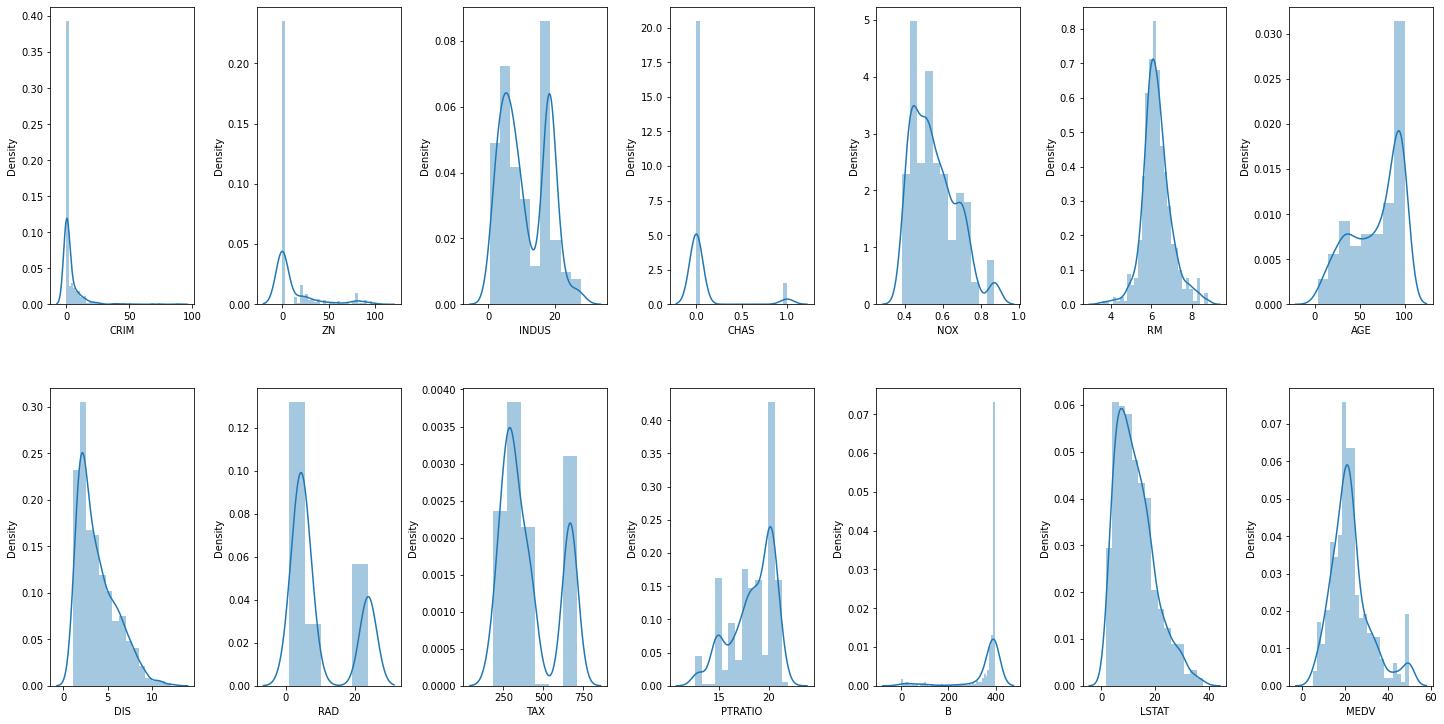

In [ ]:
#create dist plot
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
  sns.distplot(value, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## ***Min-Max Normalization***

In [ ]:
cols = ['CRIM', 'ZN', 'TAX', 'B']
for col in cols:
  # find minimum and maximum of that column
  minimum = min(df[col])
  maximum = max(df[col])
  df[col] = (df[col] - minimum) / (maximum - minimum)

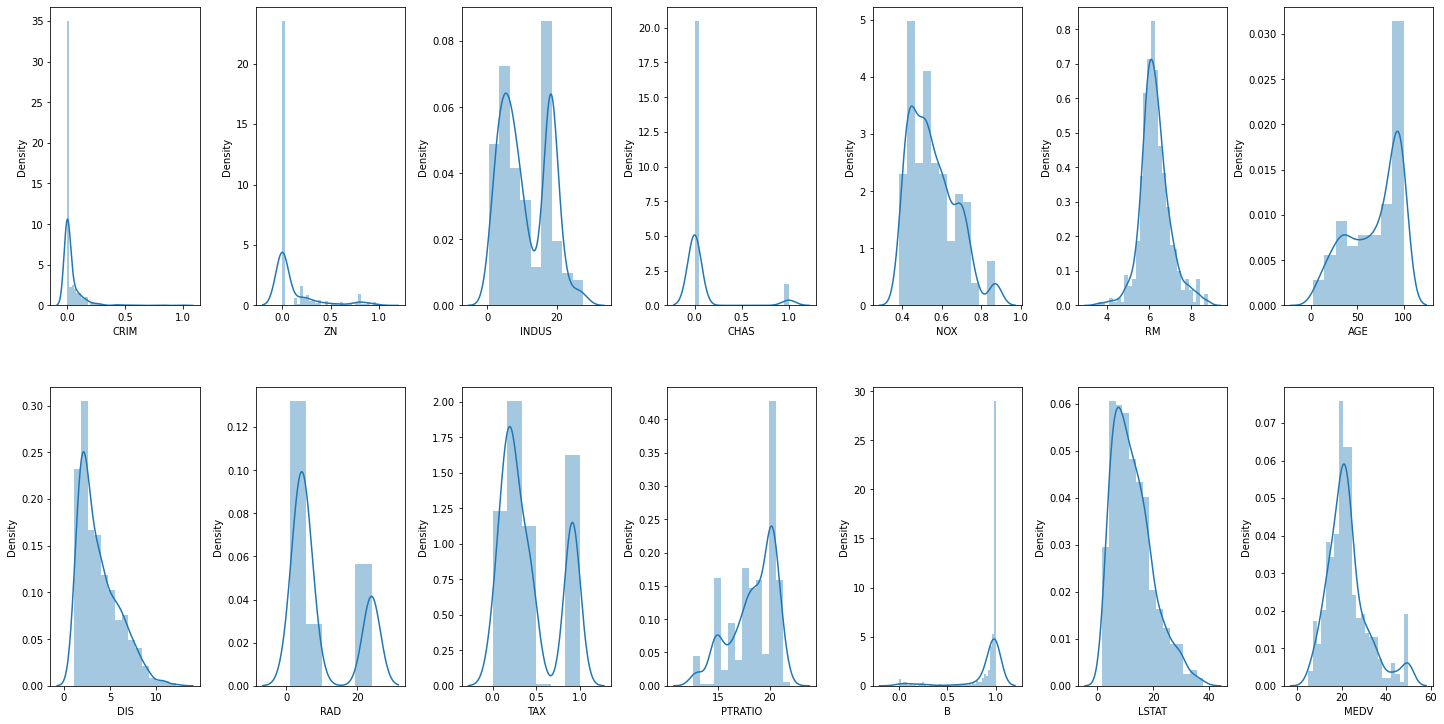

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
  sns.distplot(value, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

In [ ]:
#standarization
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

#fit our data
scaled_cols = scalar.fit_transform(df[cols])
scaled_cols = pd.DataFrame(scaled_cols, columns=cols)
scaled_cols.head()

,CRIM,ZN,TAX,B
0,-0.419782,0.284830,-0.666608,0.441052
1,-0.417339,-0.487722,-0.987329,0.441052
2,-0.417342,-0.487722,-0.987329,0.396427
3,-0.416750,-0.487722,-1.106115,0.416163
4,-0.412482,-0.487722,-1.106115,0.441052


In [ ]:
for col in cols:
  df[col] = scaled_cols[col]

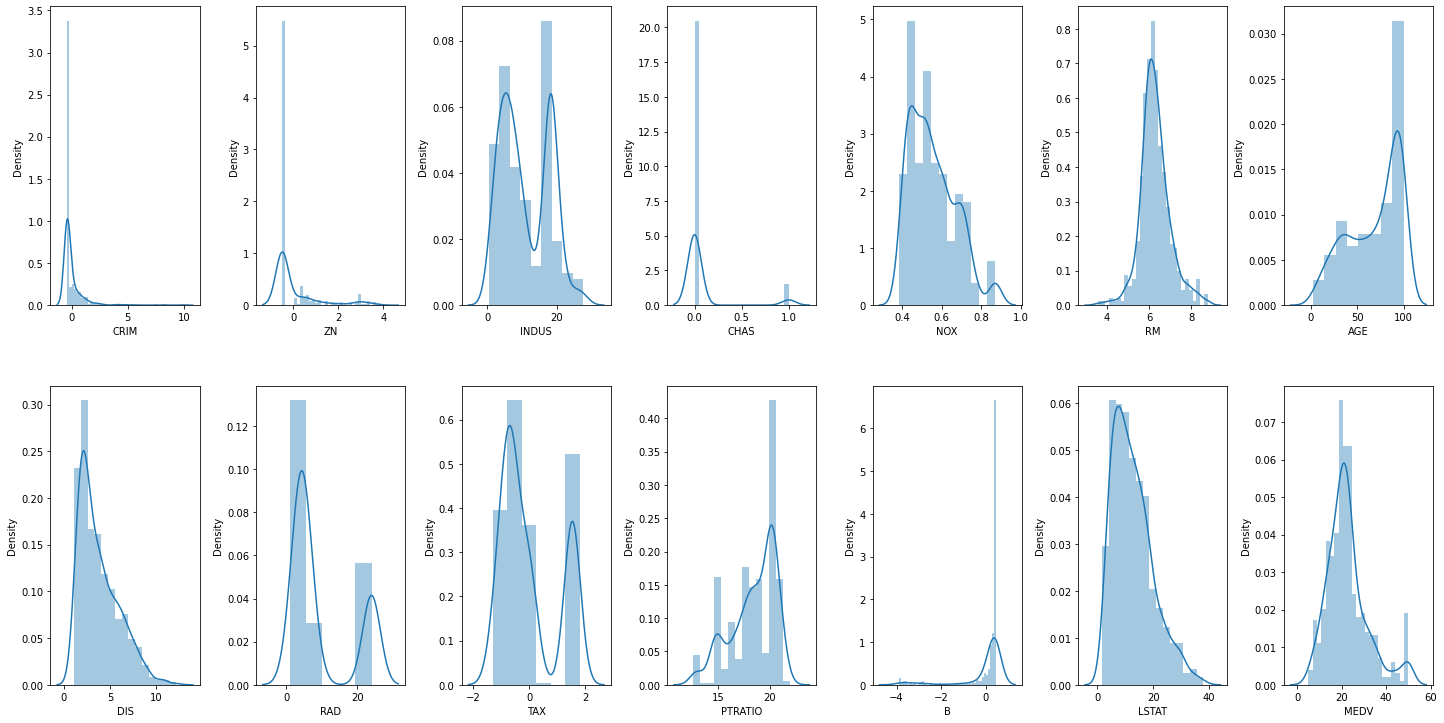

In [ ]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
ax = ax.flatten()

for col, value in df.items():
  sns.distplot(value, ax=ax[index])
  index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

## ***Overfitting vs Underfitting***
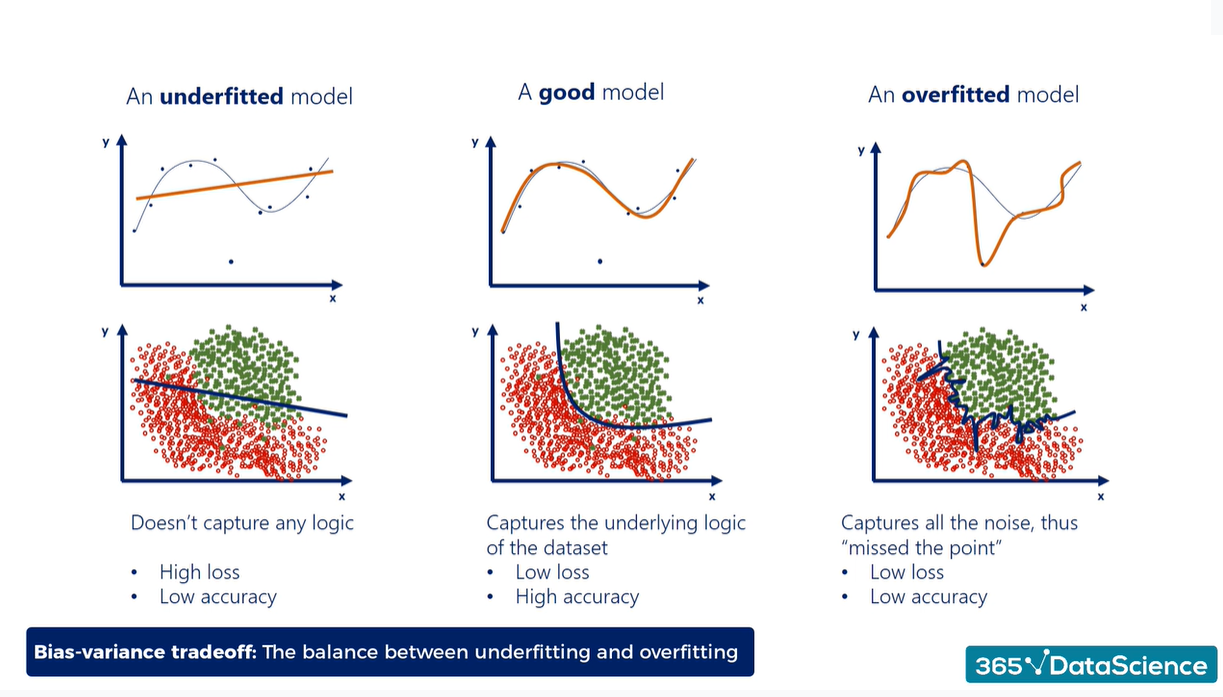

## ***Correlation Matrix***

<Axes: >

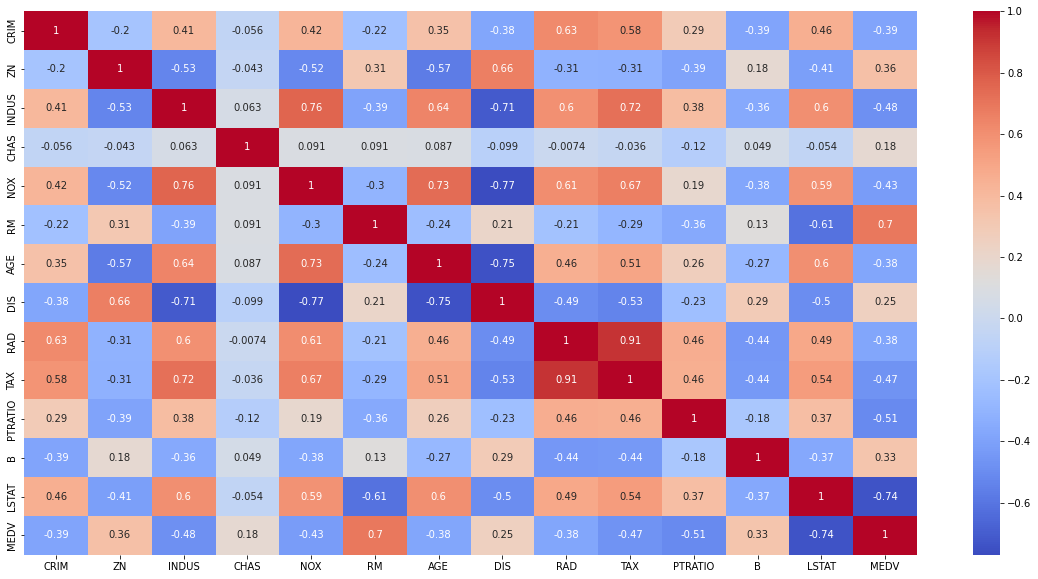

In [ ]:
corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

<Axes: xlabel='LSTAT', ylabel='MEDV'>

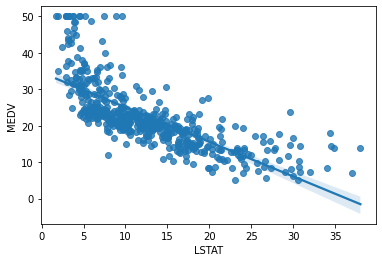

In [ ]:
sns.regplot(y=df['MEDV'], x=df['LSTAT'])

<Axes: xlabel='RM', ylabel='MEDV'>

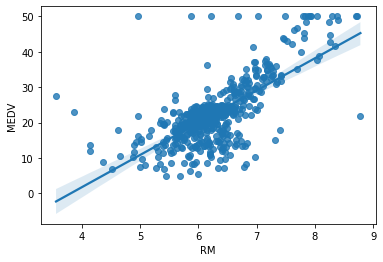

In [ ]:
sns.regplot(y=df['MEDV'], x=df['RM'])

## ***Input Split***

In [ ]:
x = df.drop(columns=['MEDV', 'RAD'], axis=1)
y = df['MEDV']

## ***Model Training***

In [ ]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
  #train the model
  x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
  model.fit(X, y)

  #predict the training set
  pred = model.predict(x_test)

  #perform cross-validation
  cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
  cv_score = np.abs(np.mean(cv_score))

  print("Model Report")
  print("MSE:",mean_squared_error(y_test, pred))
  print('CV Score:', cv_score)

Model Report
MSE: 21.35142394121705
CV Score: 35.58136621076916


<Axes: title={'center': 'Model Coefficients'}>

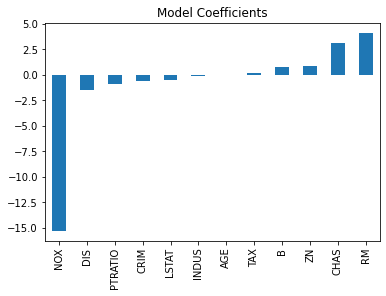

In [ ]:

from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, x, y)
coef = pd.Series(model.coef_, x.columns).sort_values()
coef.plot(kind='bar', title='Model Coefficients')

Model Report
MSE: 0.0
CV Score: 43.382791108522625


<Axes: title={'center': 'Feature Importance'}>

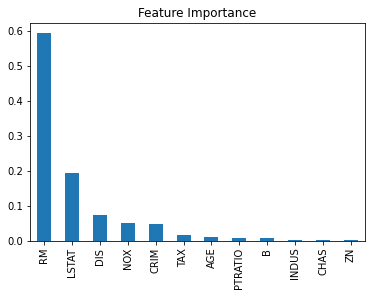

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 1.4010053228346462
CV Score: 22.163643609046773


<Axes: title={'center': 'Feature Importance'}>

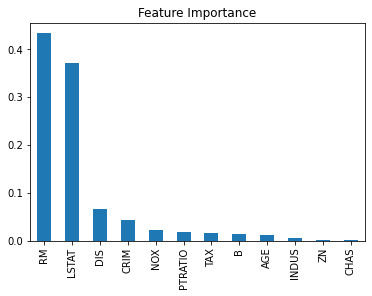

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 8.651133183902492e-28
CV Score: 18.987358419918444


<Axes: title={'center': 'Feature Importance'}>

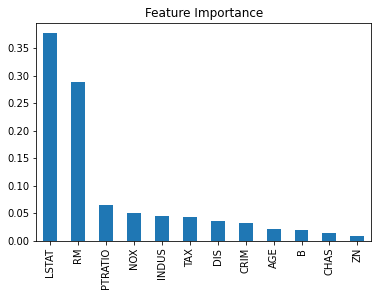

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

Model Report
MSE: 0.0009293011883614271
CV Score: 18.766198044819188


<Axes: title={'center': 'Feature Importance'}>

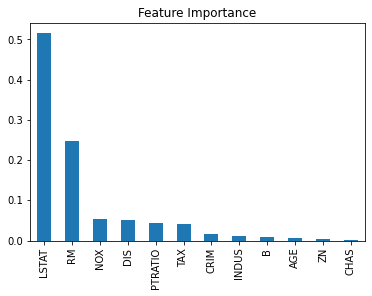

In [ ]:
import xgboost as xgb
model = xgb.XGBRegressor()
train(model, x, y)
coef = pd.Series(model.feature_importances_, x.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')
